## load data

In [34]:
import os
from ezc3d import c3d
import pandas as pd
from lisa.config import RAW_DATA_DIR
import numpy as np

file = os.path.join(RAW_DATA_DIR, 'Walk2.c3d')

In [35]:
c = c3d(file)
points = c['data']['points']

In [7]:
# Dimensions of the points array
# points.shape is (4, number_of_markers, number_of_frames)
num_dimensions, num_markers, num_frames = points.shape

# We are interested in the first three dimensions (X, Y, Z), so we ignore the residual
points_xyz = points[:3, :, :]

In [8]:
points.shape

(4, 38, 4000)

In [9]:
# Reshape the points array to a 2D array
reshaped_points = points_xyz.reshape(3 * num_markers, num_frames).T

In [10]:
reshaped_points.shape

(4000, 114)

In [11]:
# Create a MultiIndex for the DataFrame columns (marker, coordinate)
markers = [f"marker_{i+1}" for i in range(num_markers)]
coords = ['X', 'Y', 'Z']
columns = pd.MultiIndex.from_product([markers, coords])

In [12]:
columns.shape

(114,)

In [13]:
# Create a MultiIndex for the DataFrame columns (marker, coordinate)
markers = [f"marker_{i+1}" for i in range(num_markers)]
coords = ['X', 'Y', 'Z']
columns = pd.MultiIndex.from_product([markers, coords])

# Convert to DataFrame
df = pd.DataFrame(reshaped_points, columns=columns)

# Add frame number as the first level of the index
frame_numbers = np.repeat(np.arange(num_frames), num_markers)
df['frame'] = frame_numbers
df.set_index('frame', inplace=True)

ValueError: Length of values (152000) does not match length of index (4000)

## kinetics toolkit

In [14]:
import kineticstoolkit as ktk

In [15]:
c3d_contents = ktk.read_c3d(file)

c3d_contents

/Users/tomwilson/micromamba/envs/LISA/lib/python3.10/site-packages/kineticstoolkit/files.py:512: UserWarning: In the specified file, points are expressed in mm. They were automatically converted to meters by scaling them by 0.001. Please note that if this file also contains calculated values such as angles, powers, etc., they were also (wrongly) scaled by 0.001. Consult https://kineticstoolkit.uqam.ca/doc/api/ktk.read_c3d.html for more information. You can mute this warning by explicitely setting `convert_point_unit` to either True or False.
  warnings.warn(
/Users/tomwilson/micromamba/envs/LISA/lib/python3.10/site-packages/kineticstoolkit/timeseries.py:1059: UserWarning: A data info with same data_key (Global Angle.x) and info_key (Unit) already exists in ths TimeSeries. Please use overwrite=True to suppress this warning. This warning will become an error in Kinetics Toolkit 1.0.
  warnings.warn(
/Users/tomwilson/micromamba/envs/LISA/lib/python3.10/site-packages/kineticstoolkit/timese

{'Points': TimeSeries with attributes:
          time: <array of shape (4000,)>
          data: <dict with 38 entries>
     time_info: {'Unit': 's'}
     data_info: <dict with 38 entries>
        events: [],
 'Analogs': TimeSeries with attributes:
          time: <array of shape (20000,)>
          data: <dict with 27 entries>
     time_info: {'Unit': 's'}
     data_info: <dict with 27 entries>
        events: []}

In [16]:
c3d_contents["Points"].data.keys()

dict_keys(['LASIS', 'LPSIS', 'RPSIS', 'LLKN', 'LMKN', 'LT4', 'LT1', 'LT2', 'LT3', 'LLM', 'LMM', 'LSK4', 'LSK1', 'LSK2', 'LSK3', 'LCALC', 'LMH5', 'LMH1', 'RLKN', 'RMKN', 'RT4', 'RT1', 'RT2', 'RT3', 'RLM', 'RMM', 'RSK1', 'RSK4', 'RSK3', 'RSK2', 'RCALC', 'RMH5', 'RMH1', 'RASIS', '*34', '*35', '*36', '*37'])

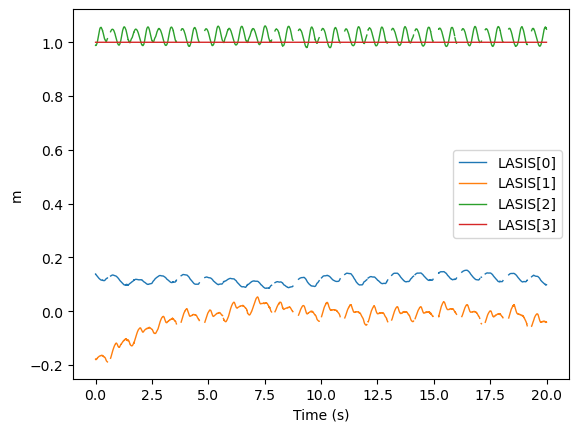

In [17]:
c3d_contents["Points"].plot(["LASIS"])

In [25]:
len(c3d_contents["Analogs"].data.keys()) 

27

In [26]:
c3d_contents["Analogs"].plot(['Force.Fz1', 'Force.Fz2'])

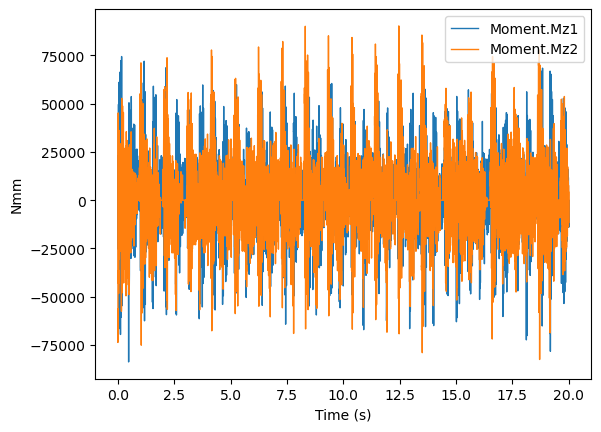

In [20]:
c3d_contents["Analogs"].plot(['Moment.Mz1', 'Moment.Mz2'])

In [36]:
# Animation
%matplotlib qt5
markers = c3d_contents["Points"]
p = ktk.Player(markers)
p.up = 'z'
p.play()

## Timeseries object

In [27]:
ts = c3d_contents["Points"]

df = ts.to_dataframe()

In [28]:
# remove 4th dimension
for key in ts.data.keys():
    ts.data[key] = ts.data[key][:, :3]


In [29]:
df = ts.to_dataframe()
df

,LASIS[0],LASIS[1],LASIS[2],LPSIS[0],LPSIS[1],LPSIS[2],RPSIS[0],RPSIS[1],RPSIS[2],LLKN[0],...,*34[2],*35[0],*35[1],*35[2],*36[0],*36[1],*36[2],*37[0],*37[1],*37[2]
0.000,0.138064,-0.177810,0.988160,-0.004349,-0.012974,1.014894,-0.066879,-0.019704,1.012174,0.168638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.005,0.137377,-0.178196,0.988074,-0.004678,-0.012691,1.015613,-0.066624,-0.020409,1.013053,0.168834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.010,0.137625,-0.179897,0.988547,-0.004836,-0.012889,1.015838,-0.066813,-0.020640,1.013551,0.168931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.015,0.137052,-0.180237,0.988994,-0.005195,-0.013000,1.016010,-0.067198,-0.020851,1.014036,0.169155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.020,0.136081,-0.179702,0.988756,-0.005471,-0.013389,1.015854,-0.067969,-0.020333,1.014821,0.169257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.975,NaN,NaN,NaN,-0.017501,0.139397,1.072832,-0.079707,0.136859,1.070325,0.144962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.076872,0.265806,0.080603
19.980,0.098805,-0.040106,1.052638,-0.016709,0.139651,1.071943,-0.078920,0.137309,1.069423,0.143968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.076590,0.273608,0.081144
19.985,0.098902,-0.040576,1.050571,-0.015980,0.139856,1.070917,-0.078155,0.137852,1.068422,0.142934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.076307,0.281828,0.081807
19.990,0.098540,-0.039973,1.049810,-0.015192,0.140008,1.069827,-0.077388,0.138356,1.067396,0.141835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.076189,0.289916,0.082724


In [ ]:
# polars can't have multi-indexed columns, but here is a demo with pandas
# features = ts.data.keys()
# dims = ['X', 'Y', 'Z']

# type(ts.data)

kineticstoolkit.timeseries.TimeSeriesDataDict

In [30]:
# plotting
df['LASIS[0]'].plot()

<Axes: >

## Polars

In [31]:
import polars as pl

In [32]:
points = c3d_contents["Points"]

labels = points['Labels']

# Get the coordinates (assuming the first three rows are X, Y, Z)
coordinates = points['Data']

# Determine the number of frames and markers
num_frames, num_markers, _ = coordinates.shape

# Create a list of column names for the DataFrame (marker_coordinate)
columns = [f"{label}_{coord}" for label in labels for coord in ['X', 'Y', 'Z']]

TypeError: 'TimeSeries' object is not subscriptable